<h1> Importing libraries </h1>

In [404]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

<h1> Load dataset </h1>


In [405]:
#Load dataset
dataset = pd.read_csv("heart_preprocessed.csv")


#Display dataset
print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    1    1   0         0     0    0        1        2      0      1.0      2   
1    1    1   0         1     0    1        0        1      1      3.1      0   
2    2    1   0         1     0    0        1        1      1      2.6      0   
3    1    1   0         1     0    0        1        2      0      0.0      2   
4    2    0   0         1     1    1        1        0      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


<h1>Preprocess Data </h1>

In [683]:
#Read target column as y
y=dataset.target

#Take all of column and drop target column as x
x=dataset.drop('target',axis=1)

#Normalizing data to value from 0-1
min_max_scaler = preprocessing.MinMaxScaler() 
x_scaled = min_max_scaler.fit_transform(x)

#Display normalized data
df = pd.DataFrame(x_scaled, columns = ['age','sex','cp', 'trestbps', 'chol', 'fbs','restecg' , 'thalach', 'exang', 'oldpeak' , 'slope' , 'ca' , 'thal'])
print(df.head())

# Split data into training and test 
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=4)

print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)
print("Y_train shape : " , y_train.shape)
print("Y_test shape : " , y_test.shape)

   age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0  0.5  1.0  0.0       0.0   0.0  0.0      0.5      1.0    0.0  0.161290   
1  0.5  1.0  0.0       0.5   0.0  1.0      0.0      0.5    1.0  0.500000   
2  1.0  1.0  0.0       0.5   0.0  0.0      0.5      0.5    1.0  0.419355   
3  0.5  1.0  0.0       0.5   0.0  0.0      0.5      1.0    0.0  0.000000   
4  1.0  0.0  0.0       0.5   0.5  1.0      0.5      0.0    0.0  0.306452   

   slope    ca      thal  
0    1.0  0.50  1.000000  
1    0.0  0.00  1.000000  
2    0.0  0.00  1.000000  
3    1.0  0.25  1.000000  
4    0.5  0.75  0.666667  
X_train shape :  (717, 13)
X_test shape :  (308, 13)
Y_train shape :  (717,)
Y_test shape :  (308,)


In [684]:
# Input layer consists 13 neuron
# Hidden layer consists 10 neuron
# Output layer consists 1 neuron
# Activation function : sigmoid

model = Sequential()
model.add(Dense(10, input_dim=13, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
trained = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.5216 - val_loss: 0.2522 - val_accuracy: 0.4935
Epoch 2/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.5286 - val_loss: 0.2453 - val_accuracy: 0.5227
Epoch 3/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.6332 - val_loss: 0.2399 - val_accuracy: 0.6721
Epoch 4/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.7001 - val_loss: 0.2352 - val_accuracy: 0.7175
Epoch 5/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.7266 - val_loss: 0.2309 - val_accuracy: 0.7240
Epoch 6/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.7336 - val_loss: 0.2265 - val_accuracy: 0.7468
Epoch 7/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.7406 - val_loss: 0.2227 - val_accuracy: 0.7435
Epoch 8/500
2

Epoch 59/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.8298 - val_loss: 0.1280 - val_accuracy: 0.8182
Epoch 60/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.8326 - val_loss: 0.1277 - val_accuracy: 0.8214
Epoch 61/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.8340 - val_loss: 0.1273 - val_accuracy: 0.8214
Epoch 62/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.8312 - val_loss: 0.1271 - val_accuracy: 0.8377
Epoch 63/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.8368 - val_loss: 0.1266 - val_accuracy: 0.8214
Epoch 64/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.8368 - val_loss: 0.1265 - val_accuracy: 0.8377
Epoch 65/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.8326 - val_loss: 0.1261 - val_accuracy: 0.8247
Epoch 

23/23 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.8354 - val_loss: 0.1185 - val_accuracy: 0.8344
Epoch 117/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.8354 - val_loss: 0.1184 - val_accuracy: 0.8344
Epoch 118/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.8354 - val_loss: 0.1184 - val_accuracy: 0.8344
Epoch 119/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.8452 - val_loss: 0.1184 - val_accuracy: 0.8506
Epoch 120/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.8396 - val_loss: 0.1182 - val_accuracy: 0.8344
Epoch 121/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.8354 - val_loss: 0.1182 - val_accuracy: 0.8377
Epoch 122/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.8522 - val_loss: 0.1183 - val_accuracy: 0.8506
Epoch 123/500

23/23 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.8340 - val_loss: 0.1158 - val_accuracy: 0.8344
Epoch 174/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.8354 - val_loss: 0.1158 - val_accuracy: 0.8442
Epoch 175/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.8438 - val_loss: 0.1157 - val_accuracy: 0.8442
Epoch 176/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.8480 - val_loss: 0.1157 - val_accuracy: 0.8571
Epoch 177/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.8410 - val_loss: 0.1156 - val_accuracy: 0.8377
Epoch 178/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.8326 - val_loss: 0.1156 - val_accuracy: 0.8377
Epoch 179/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.8340 - val_loss: 0.1156 - val_accuracy: 0.8344
Epoch 180/500

23/23 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.8424 - val_loss: 0.1144 - val_accuracy: 0.8539
Epoch 231/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.8452 - val_loss: 0.1143 - val_accuracy: 0.8474
Epoch 232/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.8424 - val_loss: 0.1143 - val_accuracy: 0.8539
Epoch 233/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.8452 - val_loss: 0.1142 - val_accuracy: 0.8539
Epoch 234/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.8452 - val_loss: 0.1142 - val_accuracy: 0.8539
Epoch 235/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.8438 - val_loss: 0.1142 - val_accuracy: 0.8539
Epoch 236/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.8396 - val_loss: 0.1142 - val_accuracy: 0.8539
Epoch 237/500

23/23 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.8452 - val_loss: 0.1134 - val_accuracy: 0.8539
Epoch 288/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.8424 - val_loss: 0.1133 - val_accuracy: 0.8539
Epoch 289/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.8424 - val_loss: 0.1133 - val_accuracy: 0.8539
Epoch 290/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.8452 - val_loss: 0.1134 - val_accuracy: 0.8539
Epoch 291/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.8438 - val_loss: 0.1133 - val_accuracy: 0.8539
Epoch 292/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.8452 - val_loss: 0.1133 - val_accuracy: 0.8539
Epoch 293/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.8396 - val_loss: 0.1133 - val_accuracy: 0.8539
Epoch 294/500

23/23 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.8438 - val_loss: 0.1127 - val_accuracy: 0.8506
Epoch 345/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.8354 - val_loss: 0.1127 - val_accuracy: 0.8506
Epoch 346/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.8438 - val_loss: 0.1126 - val_accuracy: 0.8539
Epoch 347/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.8368 - val_loss: 0.1126 - val_accuracy: 0.8506
Epoch 348/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.8326 - val_loss: 0.1126 - val_accuracy: 0.8539
Epoch 349/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.8452 - val_loss: 0.1126 - val_accuracy: 0.8539
Epoch 350/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.8368 - val_loss: 0.1125 - val_accuracy: 0.8506
Epoch 351/500

23/23 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.8452 - val_loss: 0.1117 - val_accuracy: 0.8506
Epoch 402/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.8466 - val_loss: 0.1116 - val_accuracy: 0.8539
Epoch 403/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.8410 - val_loss: 0.1116 - val_accuracy: 0.8506
Epoch 404/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.8438 - val_loss: 0.1116 - val_accuracy: 0.8506
Epoch 405/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.8452 - val_loss: 0.1116 - val_accuracy: 0.8539
Epoch 406/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.8452 - val_loss: 0.1116 - val_accuracy: 0.8604
Epoch 407/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.8466 - val_loss: 0.1116 - val_accuracy: 0.8604
Epoch 408/500

23/23 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.8508 - val_loss: 0.1103 - val_accuracy: 0.8474
Epoch 459/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.8508 - val_loss: 0.1103 - val_accuracy: 0.8636
Epoch 460/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.8494 - val_loss: 0.1103 - val_accuracy: 0.8636
Epoch 461/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.8522 - val_loss: 0.1102 - val_accuracy: 0.8636
Epoch 462/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.8480 - val_loss: 0.1102 - val_accuracy: 0.8604
Epoch 463/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.8508 - val_loss: 0.1102 - val_accuracy: 0.8636
Epoch 464/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.8550 - val_loss: 0.1102 - val_accuracy: 0.8636
Epoch 465/500

In [686]:
train_score = model.evaluate(X_train, y_train, verbose=0)

print("Train loss : {:.2f}%".format(train_score[0] *100))
print("Train accuracy : {:.2f}%".format(train_score[1] *100))

test_score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss : {:.2f}%".format(test_score[0] *100))
print("Test accuracy : {:.2f}%".format(test_score[1] *100))

model.summary()


Train loss : 10.42%
Train accuracy : 85.50%
Test loss : 10.92%
Test accuracy : 85.71%
Model: "sequential_177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_395 (Dense)           (None, 10)                140       
                                                                 
 dense_396 (Dense)           (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


<h1>Loss and Accuracy graph (for training and test data) </h1>

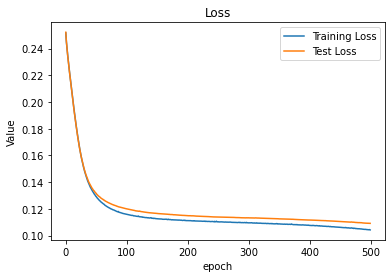

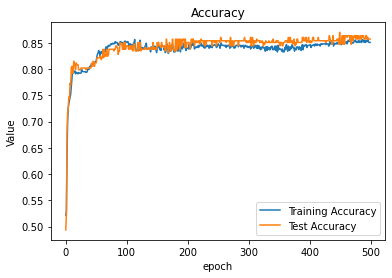

In [687]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Loss' , 'Test Loss'], loc='upper right')
plt.show()

plt.plot(trained.history['accuracy'] )
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Accuracy' , 'Test Accuracy'], loc='lower right')
plt.show()

<h1>Making prediction 

In [688]:
y_pred = model.predict(X_test)
y_test = np.array(y_test)

hold_test = 0
true_pred = 0
swap_pred = []
false_pred = 0


for i in range(308):
    if y_pred[i] <= 0.5:
        swap_pred.append(0)
    else : 
        swap_pred.append(1)
        

for i in range(308) :
    
    if swap_pred[i] == y_test[i] :
        print("Predicted Value : " , swap_pred[i] , " Actual Value : " , y_test[i] , " [True]")
        true_pred = true_pred + 1
    else : 
        print("Predicted Value : " , swap_pred[i] , " Actual Value : " , y_test[i] , " [False]")
        false_pred = false_pred + 1
        
print("Total of correct prediction : " , true_pred)
print("Total of false prediction : " , false_pred)
print("Accuracy of prediction : {:.2f}%".format(true_pred/308 * 100))


10/10 [==============================] - 0s 445us/step
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  1  [False]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Val